In [60]:
%matplotlib inline

import math

import randy
import pandas as pd
import seaborn as sns

In [2]:
from scipy.stats import truncnorm
import numpy as np
import matplotlib.pyplot as plt

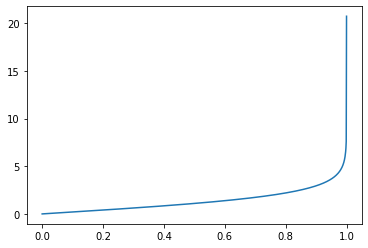

In [208]:
def stretch(s):
    assert 0 <= s <= 1, "Invalis sigma"
    x = s/2+.5
    if math.isclose(x, 0):
        x = 1e-9
    elif math.isclose(x, 1):
        x = 1-1e-9
    
    val = np.log(x/(1-x))
    #val = val ** .5
    #val = np.log(val)    
    return val

x = np.linspace(0, 1, 1000)
y = [stretch(s) for s in x]
plt.plot(x, y)

<ipython-input-195-2a59e2bd7e2c>:6: RuntimeWarning: divide by zero encountered in double_scalars
  a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
<ipython-input-195-2a59e2bd7e2c>:9: RuntimeWarning: divide by zero encountered in double_scalars
  a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std


(1.0, 20000.0)

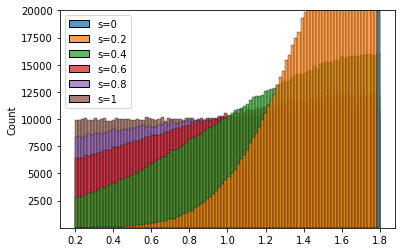

In [195]:
SAMPLES = 1_000_000
z = pd.DataFrame()
myclip_a = .2
myclip_b = 1.8
my_mean = 1.8-1e-9
a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
for s in np.linspace(0, 1, num=6):
    my_std = stretch(s)
    a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
    z[f's={s:g}'] = truncnorm.rvs(a, b, loc=my_mean, scale=my_std, size=SAMPLES)

fig, ax = plt.subplots()
sns.histplot(z, bins=100, ax=ax)
ax.set_ylim(1, SAMPLES//50) 

In [197]:
math.log(1e-9)

-20.72326583694641

In [213]:
def _stretch(sigma: float):
    assert 0 <= s <= 1, "Invalis sigma (must be [0, 1])"
    x = sigma / 2 + .5
    if math.isclose(x, 0):
        x = 1e-9
    elif math.isclose(x, 1):
        x = 1 - 1e-9

    print(x)
    val = math.log(x / (1 - x))
    return val


In [214]:
_stretch(0), _stretch(1)

0.5
0.999999999


(0.0, 20.723265864228342)

In [205]:
_stretch(0)

20.723265864228342